# Neural Network
## Intro to Deep Learning Class

## Importing Libraries
Before we start, let's import some necessary libraries we will be using.

In [ ]:
import numpy as np # NumPy
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Matplotlib
from IPython.display import display # For displaying the Pandas DataFrame
import math # Math library
from tensorflow.keras.datasets import mnist # For loading the data set
from sklearn.model_selection import train_test_split # For splitting the data set into train and test sets
from sklearn.preprocessing import OneHotEncoder # To one-hot encode the y-values

## Import Data set from Tensorflow
We will be using a data set on hand-written digits. In this data set, we are given some information about the pixel values of a picture with a numerical digit and the corresponding number. 

In this notebook, we will use Neural Networks to predict what number a hand-written digit is.

In the following code box, we import the data from Tensorflow.

In [ ]:
one_hot = OneHotEncoder(sparse=False)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1).T
x_test = x_test.reshape(x_test.shape[0], -1).T
y_train = y_train.reshape(-1,1)
y_train = one_hot.fit_transform(y_train).T
y_test = y_test.reshape(-1,1)
y_test = one_hot.transform(y_test).T

11493376/11490434 [==============================] - 0s 0us/step


### Quick-Look
In the following code box, we take a quick look at one of the images.

Label: 5


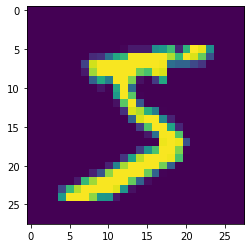

In [ ]:
image_num = 0 # Change this number to see different image examples
image = x_train[:,image_num]
label = one_hot.inverse_transform(y_train[:,image_num].reshape(1,-1))[0][0]
print("Label: " + str(label))
plt.imshow(image.reshape(28,28))
plt.show()

## Data set Features
Here is some information about the features and labels of our data set.

**X-Values (Features)**
- 784 grayscale pixel values (0 to 255)
> - There are 784 pixels in total for each image because the image dimensions are $28\times 28$.

**Y-Value (Label)**
- Label: The digit that the image is supposed to represent.

We will be turning each y-value into a one hot encoding.

In [ ]:
m_train = x_train.shape[1]
m_test = x_test.shape[1]

print("Number of examples in train set: " + str(m_train))
print("Number of examples in test set:\t " + str(m_test))

Number of examples in train set: 60000
Number of examples in test set:	 10000


In [ ]:
m = m_train + m_test
n = x_train.shape[0]
print("Number of examples: " + str(m))
print("Number of features: " + str(n))

Number of examples: 70000
Number of features: 784


## Data set Shape
In the last two code boxes, we found that our data set has 70,000 examples, 60,000 of which are in the train set and 10,000 of which are in the test set. Additionally, as we said before, both the train set and the test set have 784 features (pixel values). This kind of familiarity with the data set is always nice to know before creating the Deep Learning model. 

## Normalization
For Linear Regression, we must **normalize** our values. In this case, that means bringing the mean to 0 and the standard deviation to 1 using the following code box. Note that we only do this for the X-Values (Features).

In [ ]:
# x_train_np
x_train = x_train/255

# x_test_np
x_test = x_test/255

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Gradient Descent
Now we will move onto the Neural Network model. For Neural Networks, we use Gradient Descent. These are the steps of Gradient Descent (the parameter initialization is specific to Neural Networks, but most of these steps are applied to (mostly) all types of Machine Learning and Deep Learning algorithms): 
1. Initialize Parameters
> For Neural Networks, we initialize all parameters except for the bias parameters at random. We initialize the bias parameters to be 0.
2. Hypothesis Function
> Use the paramters and input features to compute the hypothesis $\hat{y}$. 
3. Cost Function
> Use the prediction $\hat{y}$ and the real label $y$ to compute the Binary Cross Entropy (Cross Entropy) cost function.
4. Parameter Update
> Compute the parameter update for all parameters and update them using the appropriate learning rate $\alpha$ (alpha).
5. Repeat!
> Repeat Steps 2-4 many times until the cost is sufficiently low.

In the following code boxes, we will write code for each of these steps. In the end, we will put these together to train the Neural Network model.

### Neural Network Architecture
The following image shows the architecture of the Neural Network we will be implementing. However, we want to create code so that we can easily change the architecture. So, you will see that all of the methods we will be implementing will be generalized.

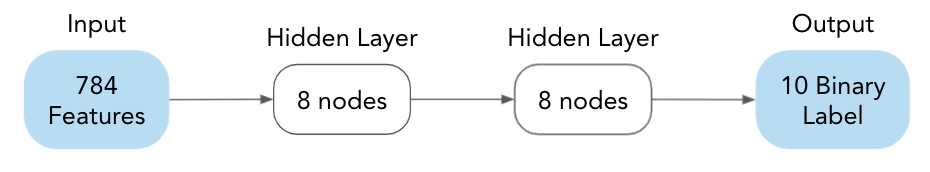

### 1. Initialize Parameters
A Neural Network has different parameters at each layer. How do we initialize the parameters for all layers? 

First, we start by creating a function to initialize the parameters for one layer. 

The parameters for one layer will be stored in a matrix of shape $n_y \times n_x$, where $n_y$ is the number of units in the next layer and $n_x$ is the number of units in the previous layer. (Remember, these parameters will be initialized at random.)

The bias parameters will be stored in an array of zeros with shape $n_y \times 1$. 

In [ ]:
def initialize_parameters_one_layer(n_x, n_y):
  W = np.random.rand(n_y, n_x)
  b = np.zeros((n_y,1))
  return W, b

In [ ]:
# Let's test it out!
W_temp, b_temp = initialize_parameters_one_layer(8,8)
print(W_temp)
print("\n\n")
print(b_temp)

[[0.9948882  0.31061237 0.59983966 0.0903806  0.39713194 0.74456186
  0.74524955 0.61054516]
 [0.40787876 0.7472519  0.21508359 0.70613346 0.09833612 0.77623298
  0.84916848 0.93004424]
 [0.37349405 0.9830624  0.56006727 0.63066102 0.58694321 0.19604183
  0.02724027 0.76783474]
 [0.64280007 0.76425092 0.09191286 0.79202201 0.46478162 0.6500469
  0.81145321 0.38500157]
 [0.46835228 0.70215198 0.28147696 0.77359609 0.60774462 0.75848635
  0.7629576  0.5458516 ]
 [0.48069041 0.36528199 0.16404106 0.213355   0.93370239 0.57034688
  0.68039659 0.46567365]
 [0.11422886 0.19365046 0.65993693 0.99365807 0.49854135 0.14871664
  0.89138876 0.21796542]
 [0.36232873 0.86834132 0.73126737 0.42163397 0.19175555 0.12868344
  0.3792012  0.1771464 ]]



[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Then, we create all of the parameters for all of the layers. To do this, we have to know the architecture of the network, so we pass that as an argument.

This argument will be a list like [784,8,8,10] (which is the network structure we will be using).

We will store the final parameters in a dictionary called "parameters," which we will return at the end of the function.

In [ ]:
def initialize_parameters(layer_dims):
  parameters = {}
  for i in range(len(layer_dims)-1):
    parameters["W" + str(i + 1)], parameters["b" + str(i + 1)] = initialize_parameters_one_layer(layer_dims[i], layer_dims[i+1])
  
  return parameters

In [ ]:
# Let's test it out!
initialize_parameters([1,8,8,1])

{'W1': array([[0.50403375],
        [0.2482813 ],
        [0.4401925 ],
        [0.80938932],
        [0.17882748],
        [0.61901345],
        [0.1650366 ],
        [0.18466573]]),
 'W2': array([[0.31584434, 0.66085578, 0.32536029, 0.07630073, 0.26280106,
         0.18086192, 0.80576887, 0.55052303],
        [0.8421674 , 0.67539196, 0.55940613, 0.46603706, 0.24337491,
         0.96732574, 0.05994815, 0.96613542],
        [0.81486762, 0.5078549 , 0.32228502, 0.80395045, 0.80621855,
         0.42159382, 0.7995287 , 0.76764003],
        [0.12166132, 0.69217668, 0.74841264, 0.41248084, 0.9953898 ,
         0.77604088, 0.78442132, 0.43921354],
        [0.62223419, 0.10602683, 0.72589688, 0.22725062, 0.20834198,
         0.14922117, 0.9117977 , 0.18231461],
        [0.46405014, 0.83205318, 0.52006071, 0.36658749, 0.06654238,
         0.04215887, 0.38908826, 0.57961021],
        [0.14434125, 0.12783952, 0.66082712, 0.45476599, 0.59337462,
         0.22681795, 0.63748266, 0.15836681],
     

### 2. Hypothesis Function
Now, we implement the hypothesis function for Neural Networks. Just like for the parameter initialization, we cannot make our code specific to our neural network architecture.

So how do we compute the hypothesis? 

We take a similar approach as in the parameter initialization. We first compute the activation units of the next layer given the activation units of the previous layer. 

Then, we create another function which repeats this process many times to compute the final hypothesis given the original inputs.

(Before we do this, we define the sigmoid function.)

Here is the sigmoid function:

In [ ]:
def sigmoid(x):
  return 1/(1+math.e**(-x))

Now, we compute the activation units of the next layer given the activation units of the last layer. 

Shape of input: $n_x\times m$

Shape of parameter (not bias parameter): $n_y\times n_x$

We want the shape: $n_y\times m$. 

Therefore, we do: 
$$\text{parameter}\times \text{input} + \text{bias parameter}.$$

Finally, we take the sigmoid of this answer.

We also return the value before we take the sigmoid for backpropagation.

In [ ]:
def hypothesis_one_layer(layer_num, input, parameters):
  W = parameters["W" + str(layer_num)]
  b = parameters["b" + str(layer_num)]

  z = np.dot(W, input) + b
  y_hat = sigmoid(z)
  return y_hat, z

To find the hypothesis, we repeat the last function a lot of times according to the layer dimensions. We have to also remember to store some of the values in a "cache" for when we do backpropagation.

In [ ]:
def hypothesis(layer_dims, x, parameters):
  cache = {}
  y_hat = x
  for i in range(len(layer_dims)-1):
    y_hat, cache["Z"+str(i+1)] = hypothesis_one_layer(i+1, y_hat, parameters)
    cache["A"+str(i+1)] = y_hat
  
  return y_hat, cache

### 3. Cost Function
Now, we define the cost function using $\hat{\textbf{Y}}$ and $\textbf{Y}$. Remember, when $\hat{\textbf{Y}}$ and $\textbf{Y}$ are matrices, the cost function is defined as follows:
$$J(\textbf{X},b,\textbf{W})=-\frac{1}{m}\left[\textbf{Y}\log{\hat{\textbf{Y}}}+(1-\textbf{Y})\log{(1-\hat{\textbf{Y}})}\right],$$
where ''$-$'' and the squaring operation represent element-wise subtraction and squaring. Note that "log" is the natural log function with base $e$. In Python code, this would be:
```
J = - 1/(m) * (y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
```
(Sidenote: For the Python function, instead of passing in $\textbf{X}$, $b$, and $\textbf{W}$, we will simply pass in $\hat{\textbf{Y}}$ (which we computed in the last step). Additionally, we will pass in $\textbf{Y}$ and $m$.) 

In the next code box, we create the cost function.

(Note: The cost function for Neural Networks is the same as the Logistic Regression cost function in this case.)

In [ ]:
def cost(y_hat, y, m):
  J = - 1/m * np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
  return J

### 4. Parameter Update
After computing the cost, we have to adjust our parameters. Recall that the parameter update for $\textbf{W}$ is:
$$W:=W-\alpha\cdot \frac{dJ}{d\textbf{W}}.$$
Similarly, this is how we update $b$:
$$b:=b-\alpha\cdot \frac{dJ}{db}.$$
To find $\frac{dJ}{d\textbf{W}}$ and $\frac{dJ}{db}$, we again find this in pieces. Because we did not learn Calculus, do not worry about how we find these values. Just note how we use them to update the Neural Network weights.

(Implementational Detail: We store all of the gradients (parameter updates) in a dictionary called "grads" in the parameter update function.)

In [ ]:
def parameter_update_one_layer(dz, a, z, w):
  dW = 1/m * np.dot(dz, a.T)
  db = 1/m * np.sum(dz, axis=1, keepdims=True)
  dZ = np.dot(w.T, dz) * (sigmoid(z) * (1-sigmoid(z)))

  return dW, db, dZ

Now, we write the parameter update function to update all parameters.

In [ ]:
def parameter_update(layer_dims, y, cache, parameters, alpha=0.1):
  grads = {}
  A = cache["A"+str(len(layer_dims)-1)]
  dZ = A - y
  A = cache["A"+str(len(layer_dims)-2)]
  Z = cache["Z"+str(len(layer_dims)-2)]
  grads["dZ"+str(len(layer_dims)-1)] = dZ
  W = parameters["W"+str(len(layer_dims)-1)]

  for i in range(len(layer_dims)-1, 1, -1):
    dW, db, dZ = parameter_update_one_layer(dZ, A, Z, W)
    grads["dW"+str(i)] = dW
    grads["db"+str(i)] = db
    grads["dZ"+str(i)] = dZ

    A = cache["A"+str(i-1)]
    Z = cache["Z"+str(i-1)]
    W = parameters["W"+str(i-1)]
  
  for i in grads.keys():
    if i[1] == "W" or i[1] == "b":
      parameters[i[1:]] = parameters[i[1:]] - alpha * grads[i]
  
  return parameters

### Put it all together!
We will now do Step 5 of Gradient Descent (Repeat!) by putting all of the previous functions together into a model function. This is what we will do in this function:
1. Initialize Parameters

For as many iterations as we chose to train our model:
2. Compute Hypothesis
3. Compute Cost Function
4. Update Parameters

Finally, we return the learned parameters $\textbf{W}$ and $b$. While training the model, we will print the cost on the train set every few iterations and, along with this, the cost on the test set. We will keep track of these costs and return some values that are helpful in graphing our performance.

In the following code box, we create the model function.

In [ ]:
def model(x_train, y_train, m_train, x_test, y_test, m_test, layer_dims, alpha=0.1, iterations=100):
  # Initialize Parameters
  parameters = initialize_parameters(layer_dims)

  # Keep track of costs for train and test sets
  iteration_nums = [] # X-value for performance graph
  costs_train = []
  costs_test = []

  # Repeat the following steps of Gradient Descent using a for-loop
  for i in range(iterations):
    # Compute Hypothesis
    y_hat, cache = hypothesis(layer_dims, x_train, parameters)

    # Compute Cost Function for train set and test set and print this out
    # Only do this once every 1 iteration
    if i % 1 == 0:
      iteration_nums.append(i) # Add iteration number to list of iteration numbers
      cost_train = cost(y_hat, y_train, m_train) # Compute cost for train set
      costs_train.append(cost_train) # Add cost to list of train costs
      y_hat_test, _ = hypothesis(layer_dims, x_test, parameters) # Compute hypothesis for test set
      cost_test = cost(y_hat_test, y_test, m_test) # Compute cost for test set
      costs_test.append(cost_test) # Add cost to list of test costs
      print("\n\nIteration " + str(i+1))
      print("Train set cost: " + str(cost_train))
      print("Test set cost: " + str(cost_test))
    
    # Update Parameters
    parameters = parameter_update(layer_dims, y_train, cache, parameters, alpha)
  
  # Print final costs for train and test sets
  iteration_nums.append(iterations) # Add iteration number to list of iteration numbers
  y_hat, _ = hypothesis(layer_dims, x_train, parameters) # Compute hypothesis for train set
  cost_train = cost(y_hat, y_train, m_train) # Compute cost for train set
  costs_train.append(cost_train) # Add cost to list of train costs
  y_hat_test, _ = hypothesis(layer_dims, x_test, parameters) # Compute hypothesis for test set
  cost_test = cost(y_hat_test, y_test, m_test) # Compute cost for test set
  costs_test.append(cost_test) # Add cost to list of test costs
  print("\n\n")
  print("Final train set cost: " + str(cost_train))
  print("Final test set cost: " + str(cost_test))

  # Return learned parameters
  return parameters, iteration_nums, costs_train, costs_test

## Training the Model
Finally, we get to train the Neural Network model. In the next code box, we run the model function with the appropriate arguments and store the learned parameters in the variable "parameters."

Note that we use [784,8,8,10] for the value of "layer_dims" because of the Neural Network architecture we decided on.

In [ ]:
layer_dims = [784,8,8,10]

In [ ]:
parameters, iteration_nums, costs_train, costs_test = model(x_train, y_train, m_train, x_test, y_test, m_test, layer_dims, alpha=0.1, iterations=100)



Iteration 1
Train set cost: 35.07658208824893
Test set cost: 35.08643914912262


Iteration 2
Train set cost: 29.49682882032977
Test set cost: 29.5063886113274


Iteration 3
Train set cost: 24.283044178226376
Test set cost: 24.292135570154073


Iteration 4
Train set cost: 19.570206944748893
Test set cost: 19.578618183567112


Iteration 5
Train set cost: 15.487951238926728
Test set cost: 15.495470592735796


Iteration 6
Train set cost: 12.132084141206459
Test set cost: 12.138562771311786


Iteration 7
Train set cost: 9.533488428554469
Test set cost: 9.538895864218208


Iteration 8
Train set cost: 7.638942197203305
Test set cost: 7.643369645153778


Iteration 9
Train set cost: 6.323750698917708
Test set cost: 6.327358008042367


Iteration 10
Train set cost: 5.435211583873795
Test set cost: 5.438166375023456


Iteration 11
Train set cost: 4.836756871603709
Test set cost: 4.839201930578125


Iteration 12
Train set cost: 4.427906486600051
Test set cost: 4.429952860178958


Iteration 13
Tra

## Plotting Results

Now, we plot our results to visualize how the model learned. In the following code box, we use matplotlib and the costs from the model training to create a graph with: 

$x$-axis: # of Iterations;

$y$-axis: Cost.

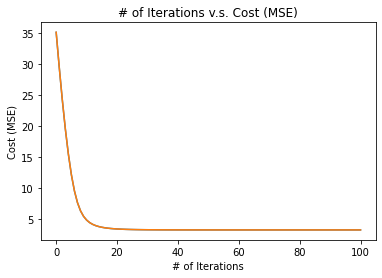

In [ ]:
plt.plot(iteration_nums, costs_train)
plt.plot(iteration_nums, costs_test)
plt.title("# of Iterations v.s. Cost (MSE)")
plt.xlabel("# of Iterations")
plt.ylabel("Cost (MSE)")
plt.show()

This plot is a bit zoomed out, so we will zoom in by only plotting the first 10,000 iterations onward.

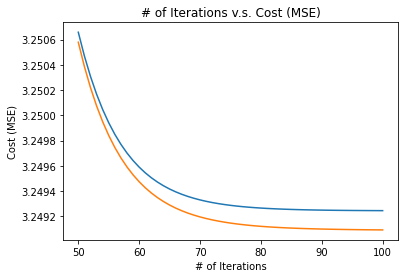

In [ ]:
plt.plot(iteration_nums[50:], costs_train[50:])
plt.plot(iteration_nums[50:], costs_test[50:])
plt.title("# of Iterations v.s. Cost (MSE)")
plt.xlabel("# of Iterations")
plt.ylabel("Cost (MSE)")
plt.show()

## Making Predictions
In the next code box, we make predictions for some value in the test set. We will print out the prediction along with the real value.

Feel free to play around with this code and make predictions on different examples.

Hypothesis: 1
Real Label: 1


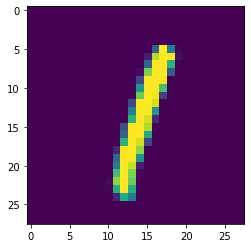

In [ ]:
example_num = 5 # This is the example number. Feel free to change it.
hypothesis_example = hypothesis(layer_dims, x_test[:,example_num].reshape(-1,1), parameters)[0]
real_label_example = one_hot.inverse_transform(y_test[:,example_num].reshape(1,-1))[0][0]
print("Hypothesis: " + str(np.where(np.max(hypothesis_example) == hypothesis_example)[0][0]))
print("Real Label: " + str(real_label_example))
plt.imshow(x_test[:,example_num].reshape(28,28)*255)
plt.show()

## Congratulations!
You have now implemented a Neural Network model from scratch. You should be proud of yourself!

The main takeaway from this assignment is the Gradient Descent algorithm, which has the following steps:

1. Initialize Parameters
2. Compute Hypothesis
3. Compute Cost Function
4. Update Parameters
5. Repeat!

Try Experimenting: What happens when you add more hidden layers?

I hope you had fun!